In [2]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
%matplotlib inline

In [58]:
image_file = "scraped_image.jpg"
image = face_recognition.load_image_file(image_file)
face_landmarks_list = face_recognition.face_landmarks(image)

In [59]:
for d in face_landmarks_list:
    left_eye = (d['left_eye'])
    right_eye = (d['right_eye'])


In [60]:
print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

I found 1 face(s) in this photograph.


In [61]:
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

In [62]:
for face_landmarks in face_landmarks_list:
    # Print the location of each facial feature in this image
    facial_features = [
        'chin',
        'left_eyebrow',
        'right_eyebrow',
        'nose_bridge',
        'nose_tip',
        'left_eye',
        'right_eye',
        'top_lip',
        'bottom_lip'
    ]
    
    for facial_feature in facial_features:
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in facial_features:
        d.line(face_landmarks[facial_feature], width=5)

# Display drawed image
#pil_image.show()
pil_image.save('test.png')

The chin in this face has the following points: [(70, 75), (66, 86), (61, 98), (58, 110), (57, 121), (59, 133), (61, 143), (65, 153), (73, 160), (85, 163), (99, 163), (114, 161), (127, 156), (139, 148), (148, 137), (154, 124), (160, 110)]
The left_eyebrow in this face has the following points: [(75, 72), (79, 68), (85, 69), (92, 72), (97, 77)]
The right_eyebrow in this face has the following points: [(109, 83), (120, 83), (130, 88), (139, 96), (144, 105)]
The nose_bridge in this face has the following points: [(99, 90), (95, 97), (90, 104), (85, 112)]
The nose_tip in this face has the following points: [(79, 112), (81, 116), (85, 120), (91, 120), (98, 121)]
The left_eye in this face has the following points: [(78, 83), (83, 82), (88, 84), (92, 89), (86, 88), (81, 86)]
The right_eye in this face has the following points: [(113, 99), (120, 99), (125, 101), (130, 106), (124, 106), (118, 103)]
The top_lip in this face has the following points: [(72, 122), (77, 124), (82, 126), (85, 128), (

In [63]:
def draw_line(ax,x1,y1,x2,y2,color='black'):
    ax.annotate('', # empty text
                xy=(x1, y1),
                xytext=(x2, y2),
                ha='center', # ha = 'left',
                va='bottom',
                arrowprops=dict(edgecolor=color,arrowstyle="<->",linestyle='--') # facecolor=color,
               )
    
def add_index(ax,text,x,y,v_offset=3,color='black'):
    ax.annotate(text,
                xy=(x, y),
                xytext=(0, v_offset),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', # ha = 'left',
                va='bottom',
                color=color
               )

In [64]:
x1, y1 = left_eye[0][0], left_eye[0][1] 
x2, y2 = left_eye[3][0], left_eye[3][1]
x_m_left = (x1 + x2)/2
y_m_left = (y1 + y2)/2
print(f"Mid point of left eye: {x_m_left, y_m_left}")
x1, y1 = right_eye[0][0], right_eye[0][1] 
x2, y2 = right_eye[3][0], right_eye[3][1]
x_m_right = (x1 + x2)/2
y_m_right = (y1 + y2)/2
print(f"Mid point of right eye: {x_m_right, y_m_right}")



Mid point of left eye: (85.0, 86.0)
Mid point of right eye: (121.5, 102.5)


In [65]:
def eye():
#     left_eye = [(328, 471), (350, 453), (381, 455), (408, 478), (378, 483), (348, 481)]
#     right_eye = [(526, 478), (553, 456), (585, 453), (609, 473), (587, 484), (556, 484)]
    x1 = [ x for x,y in left_eye]
    y1 = [ y for x,y in left_eye]
    x2 = [ x for x,y in right_eye]
    y2 = [ y for x,y in right_eye]
    left_eye_center = [x_m_left, y_m_left]
    right_eye_center = [x_m_right, y_m_right]
    x_values = [left_eye_center[0], right_eye_center[0]]
    y_values = [left_eye_center[1], right_eye_center[1]]
    fig, ax = plt.subplots()
    ax.plot(x1, y1,color='green', marker='*')
    ax.plot(x2, y2,color='blue', marker='*')
    ax.plot(x_values, y_values, marker='o')
    plt.gca().invert_yaxis()
    
    for i in range(6):
        x = left_eye[i][0]
        y = left_eye[i][1]
        add_index(ax,str(i),x,y,color='green',v_offset=5)
        
    for i in range(6):
        x = right_eye[i][0]
        y = right_eye[i][1]
        add_index(ax,str(i),x,y,color='green',v_offset=-20)
        
    plt.show()
    

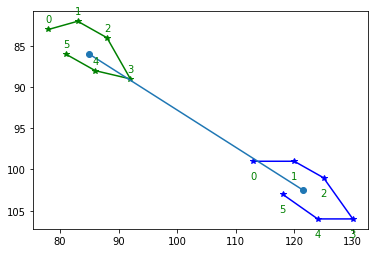

In [66]:
eye()

In [67]:
x1, y1 = 328, 471 
x2, y2 = 408, 478
x_m_point = (x1 + x2)/2
y_m_point = (y1 + y2)/2
print(f"Mid point of left eye: {x_m_point, y_m_point}")
x1, y1 = 526, 478
x2, y2 = 609, 473
x_m_point = (x1 + x2)/2
y_m_point = (y1 + y2)/2
print(f"Mid point of right eye: {x_m_point, y_m_point}")

Mid point of left eye: (368.0, 474.5)
Mid point of right eye: (567.5, 475.5)


In [71]:
left_eye_center = [x_m_left, y_m_left]
right_eye_center = [x_m_right, y_m_right]
dy = right_eye_center[1] - left_eye_center[1]
dx = right_eye_center[0] - left_eye_center[0]
angle = np.degrees(np.arctan2(dy, dx)) - 180
angle=abs(angle)
angle

155.67442476087388

In [72]:
if (angle>0 and angle<5) or (angle>175 and angle<180):
    print("good score")
else:
    print("bad score")

bad score
